In [182]:
import pandas as pd
import numpy as np
import datetime 
import seaborn as sns
import config 

In [183]:
# get module variables
ROOT_DIR = config.ROOT_DIR

In [184]:
student_grades = pd.read_csv(rf"{ROOT_DIR}\data\student_grades.csv")

In [185]:
student_grades.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252,276,Placed,111000.0
1,2,Business,62.1,92.8,No,423,410,Not Placed,NaN
2,3,Computer Science,70.2,68.7,Yes,101,119,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288,334,Not Placed,NaN
4,5,Finance,60.9,74.9,No,248,252,Not Placed,NaN


In [186]:
student_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              95 non-null     int64  
 1   Undergrad Degree        95 non-null     object 
 2   Undergrad Grade         95 non-null     float64
 3   MBA Grade               95 non-null     float64
 4   Work Experience         95 non-null     object 
 5   Employability (Before)  95 non-null     int64  
 6   Employability (After)   95 non-null     int64  
 7   Status                  95 non-null     object 
 8   Annual Salary           53 non-null     float64
dtypes: float64(3), int64(3), object(3)
memory usage: 6.8+ KB


In [187]:
# summary satistics for numeric columns
student_grades.loc[:, ["Undergrad Grade", "MBA Grade", "Employability (Before)", "Employability (After)", "Annual Salary"]].describe()

,Undergrad Grade,MBA Grade,Employability (Before),Employability (After),Annual Salary
count,95.000000,95.000000,95.000000,95.000000,53.000000
mean,74.973684,80.169474,239.905263,289.347368,119386.792453
std,7.541731,6.170780,85.940488,93.521049,45546.958176
min,60.900000,62.600000,62.000000,102.000000,75500.000000
25%,68.700000,76.050000,181.500000,228.000000,99000.000000
50%,75.600000,80.200000,236.000000,286.000000,104500.000000
75%,79.350000,84.650000,287.000000,348.000000,124000.000000
max,100.000000,96.100000,423.000000,481.000000,340000.000000


#### What is absolute number and propertion of undergrad degrees taken by students?

In [188]:
# absolute frequency table for Undergrad Degree
student_grades.loc[:, ["Undergrad Degree"]].value_counts().to_frame(name="Absolute Frequency")

,Absolute Frequency
Undergrad Degree,
Business,36
Computer Science,19
Engineering,18
Finance,13
Art,9


In [189]:
# relative frequency table for Undergrad Degree
student_grades.loc[:, ["Undergrad Degree"]].value_counts(normalize=True).to_frame(name="Relative Frequency")

,Relative Frequency
Undergrad Degree,
Business,0.378947
Computer Science,0.200000
Engineering,0.189474
Finance,0.136842
Art,0.094737


### What proportion of graduates were placed within 2 months of graduation?

In [190]:
# absolute frequency table for Categorical Variable Status
student_grades.loc[:, ["Status"]].value_counts().to_frame(name="Absolute Frequency")

,Absolute Frequency
Status,
Placed,53
Not Placed,42


In [191]:
# relative frequency table for Categorical Variable Status
student_grades.loc[:, ["Status"]].value_counts(normalize=True).to_frame(name="Relative Frequency")

,Relative Frequency
Status,
Placed,0.557895
Not Placed,0.442105


#### Analyze continuous numeric variable Undergrad grade

In [192]:
student_grades.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252,276,Placed,111000.0
1,2,Business,62.1,92.8,No,423,410,Not Placed,NaN
2,3,Computer Science,70.2,68.7,Yes,101,119,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288,334,Not Placed,NaN
4,5,Finance,60.9,74.9,No,248,252,Not Placed,NaN


In [193]:
sns.set_style('whitegrid')

# extract the bin edges for Undergrad Grade
bin_edges = np.histogram(student_grades["Undergrad Grade"])[1]
print(bin_edges)

[ 60.9   64.81  68.72  72.63  76.54  80.45  84.36  88.27  92.18  96.09
 100.  ]


In [194]:
pd.merge(left=pd.cut(student_grades["Undergrad Grade"], bins=bin_edges).value_counts().to_frame(name="Absolute Frequency"), right=pd.cut(student_grades["Undergrad Grade"], bins=bin_edges).value_counts(normalize=True).to_frame(name="Relative Frequency"), left_index=True, right_index=True).reset_index().rename(columns={"index": "Undergrad Grade"})

,Undergrad Grade,Absolute Frequency,Relative Frequency
0,"(72.63, 76.54]",24,0.255319
1,"(64.81, 68.72]",17,0.180851
2,"(76.54, 80.45]",15,0.159574
3,"(80.45, 84.36]",13,0.138298
4,"(68.72, 72.63]",11,0.117021
5,"(60.9, 64.81]",7,0.074468
6,"(88.27, 92.18]",3,0.031915
7,"(84.36, 88.27]",2,0.021277
8,"(92.18, 96.09]",1,0.010638
9,"(96.09, 100.0]",1,0.010638


<AxesSubplot: title={'center': 'Undergrad Grade Distribution'}, ylabel='Frequency'>

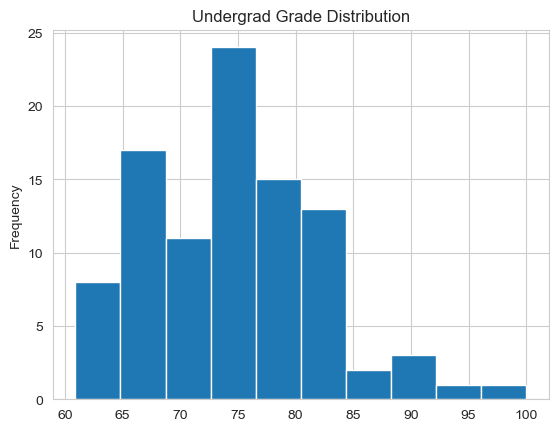

In [195]:
student_grades["Undergrad Grade"].plot(kind="hist", title="Undergrad Grade Distribution")

In [196]:
# extract the bin edges for MBA Grade
bin_edges = np.histogram(student_grades["MBA Grade"])[1]
print(bin_edges)

[62.6  65.95 69.3  72.65 76.   79.35 82.7  86.05 89.4  92.75 96.1 ]


In [197]:
pd.merge(left=pd.cut(student_grades["MBA Grade"], bins=bin_edges).value_counts().to_frame("Absolute Frequency"), right=pd.cut(student_grades["MBA Grade"], bins=bin_edges).value_counts(normalize=True).to_frame("Relative Frequency"), left_index=True, right_index=True).reset_index().rename(columns={"index": "MBA Grade"})


,MBA Grade,Absolute Frequency,Relative Frequency
0,"(79.35, 82.7]",21,0.223404
1,"(82.7, 86.05]",18,0.191489
2,"(76.0, 79.35]",16,0.170213
3,"(69.3, 72.65]",11,0.117021
4,"(86.05, 89.4]",11,0.117021
5,"(72.65, 76.0]",10,0.106383
6,"(89.4, 92.75]",3,0.031915
7,"(65.95, 69.3]",2,0.021277
8,"(92.75, 96.1]",2,0.021277
9,"(62.6, 65.95]",0,0.000000


<AxesSubplot: title={'center': 'MBA Grade Distribution'}, ylabel='Frequency'>

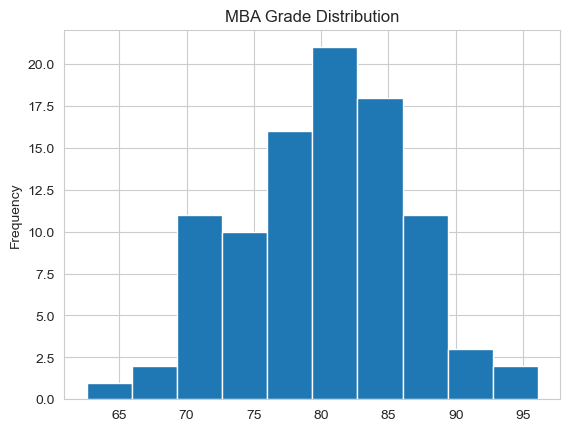

In [198]:
student_grades["MBA Grade"].plot(kind="hist", title="MBA Grade Distribution")

In [199]:
# extract the bin edges for Annual Salary
bin_edges = np.histogram(student_grades["Annual Salary"].dropna(), bins=15)[1]

In [200]:
# get the absolute frequency table for the bin edges from above distribution
pd.merge(left= pd.cut(student_grades["Annual Salary"], bins=bin_edges).value_counts().to_frame("Absolute Frequency"), right=pd.cut(student_grades["Annual Salary"], bins=bin_edges).value_counts(normalize=True).to_frame("Relative Frequency"), left_index=True, right_index=True).reset_index().rename(columns={"index": "Annual Salary Range"})

,Annual Salary Range,Absolute Frequency,Relative Frequency
0,"(93133.333, 110766.667]",19,0.365385
1,"(75500.0, 93133.333]",11,0.211538
2,"(110766.667, 128400.0]",11,0.211538
3,"(146033.333, 163666.667]",3,0.057692
4,"(128400.0, 146033.333]",2,0.038462
5,"(163666.667, 181300.0]",2,0.038462
6,"(181300.0, 198933.333]",1,0.019231
7,"(198933.333, 216566.667]",1,0.019231
8,"(251833.333, 269466.667]",1,0.019231
9,"(322366.667, 340000.0]",1,0.019231


<AxesSubplot: title={'center': 'Annual Salary Distribution for MBA Graduates'}, ylabel='Frequency'>

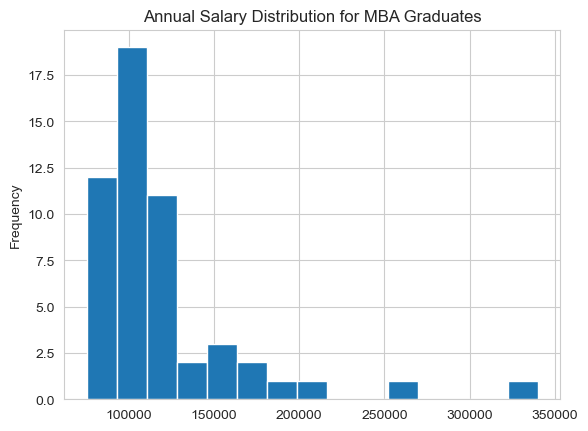

In [201]:
student_grades["Annual Salary"].plot(kind="hist", bins=15, title="Annual Salary Distribution for MBA Graduates")

#### What are mean, median and mode for numeric variables?

In [202]:
print(f'Annual Salary mean: {student_grades["Annual Salary"].mean()}')
print(f'Annual Salary median: {student_grades["Annual Salary"].median()}')
print(f'Annual Salary mode: {student_grades["Annual Salary"].mode()[0]}')

Annual Salary mean: 119386.7924528302
Annual Salary median: 104500.0
Annual Salary mode: 103500.0


In [203]:
# find measures of central tendency of annual salary for work experience (possible confounding variable)
grade_exp = student_grades.groupby("Work Experience").agg({"Annual Salary": ["mean", "median", pd.Series.mode]})

print("Measures of central tendency for graduates with work experience -->")
print(f'Annual Salary mean: {grade_exp["Annual Salary"]["mean"].loc["Yes"]}')
print(f'Annual Salary median: {grade_exp["Annual Salary"]["median"].loc["Yes"]}')
print(f'Annual Salary mode: {grade_exp["Annual Salary"]["mode"].loc["Yes"]}')

print("\n")
print("Measures of central tendency for graduates without work experience -->")
print(f'Annual Salary mean: {grade_exp["Annual Salary"]["mean"].loc["No"]}')
print(f'Annual Salary median: {grade_exp["Annual Salary"]["median"].loc["No"]}')
print(f'Annual Salary mode: {grade_exp["Annual Salary"]["mode"].loc["No"]}')

Measures of central tendency for graduates with work experience -->
Annual Salary mean: 124647.05882352941
Annual Salary median: 103500.0
Annual Salary mode: [ 99000.  99500. 103500. 124500.]


Measures of central tendency for graduates without work experience -->
Annual Salary mean: 116902.77777777778
Annual Salary median: 105750.0
Annual Salary mode: 103500.0


In [204]:
# find skew for numeric columns
student_grades.loc[:, ["Undergrad Grade", "MBA Grade", "Annual Salary"]].skew(axis=0)

Undergrad Grade    0.417548
MBA Grade         -0.120621
Annual Salary      2.932434
dtype: float64

In [205]:
print(f"Undergrad Grade mean: {student_grades['Undergrad Grade'].mean()}")
print(f"Undergrad Grade median: {student_grades['Undergrad Grade'].median()}")
print(f"Undergrad Grade mode: {student_grades['Undergrad Grade'].mode()[0]}")

Undergrad Grade mean: 74.97368421052632
Undergrad Grade median: 75.6
Undergrad Grade mode: 68.7


In [206]:
print(f"MBA Grade mean: {student_grades['MBA Grade'].mean()}")
print(f"MBA Grade median: {student_grades['MBA Grade'].median()}")
print(f"MBA Grade mode: {student_grades['MBA Grade'].mode()[0]}")

MBA Grade mean: 80.16947368421053
MBA Grade median: 80.2
MBA Grade mode: 77.8


#### What are measures of central tendency for MBA grades accounting for degree (Business/Non-Business)?

In [207]:
def map_degree(x):
    if x != "Business":
        return "Non-Business"
    else:
        return x
    return np.nan

In [208]:
student_grades["Undergrad_Degree_Derive"] = student_grades["Undergrad Degree"].transform(map_degree)

In [209]:
student_grades.loc[:, ["Undergrad_Degree_Derive", "MBA Grade"]].groupby("Undergrad_Degree_Derive").agg(["mean", "median", pd.Series.mode, "skew"])

MBA Grade                       
                              mean median  mode      skew
Undergrad_Degree_Derive                                  
Business                 81.327778  80.55  87.5  0.288165
Non-Business             79.462712  80.00  80.7 -0.606018

<AxesSubplot: title={'center': 'MBA Grade Distribution for Business Degree'}, ylabel='Frequency'>

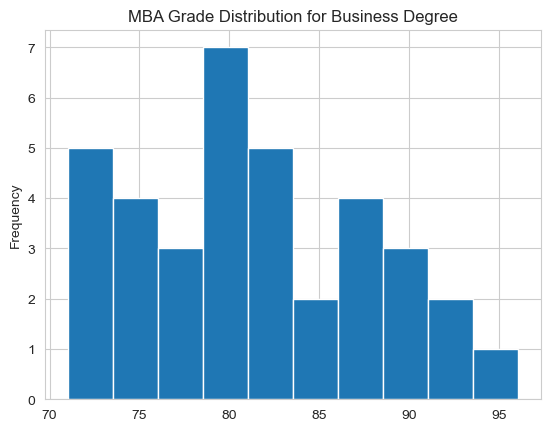

In [210]:
# plot histogram for MBA Grade for Business Degree
student_grades.loc[student_grades["Undergrad_Degree_Derive"] == "Business", "MBA Grade"].plot(kind="hist", title="MBA Grade Distribution for Business Degree")

<AxesSubplot: title={'center': 'MBA Grade Distribution for Non-Business Degree'}, ylabel='Frequency'>

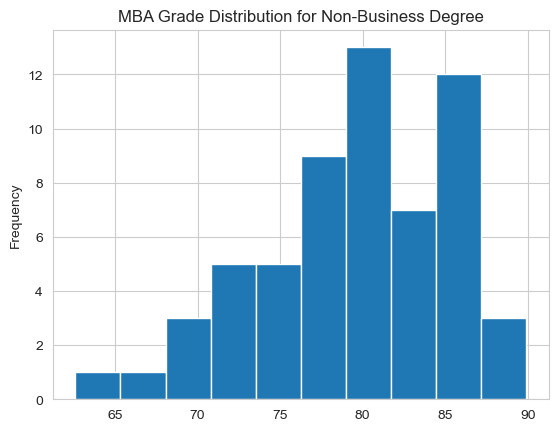

In [211]:
# plot histogram for MBA Grade for Non-Business Degree
student_grades.loc[student_grades["Undergrad_Degree_Derive"] == "Non-Business", "MBA Grade"].plot(kind="hist", title="MBA Grade Distribution for Non-Business Degree")

#### How does the total spread of the graduates' employability scores compare before and after the MBA programs?

In [212]:
min_max = student_grades.loc[:, ["Employability (Before)", "Employability (After)"]].agg(["min", "max"])
range_before = min_max["Employability (Before)"]["max"] - min_max["Employability (Before)"]["min"]
range_after = min_max["Employability (After)"]["max"] - min_max["Employability (After)"]["min"]

# get min, max and range for Employability (Before) and Employability (After)
pd.concat([min_max, pd.DataFrame({"Employability (Before)": range_before, "Employability (After)": range_after}, index=["range"])])

,Employability (Before),Employability (After)
min,62,102
max,423,481
range,361,379


In [213]:
from scipy.stats import iqr

# compute IQR for Employability (Before) and Employability (After)
iqr_ser = student_grades.loc[:, ["Employability (Before)", "Employability (After)"]].agg(iqr)

# get descriptive statistics for Employability (Before) and Employability (After) including IQR
pd.concat([student_grades.loc[:, ["Employability (Before)", "Employability (After)"]].describe().drop(index=["count", "std"]), pd.DataFrame({"Employability (Before)": iqr_ser["Employability (Before)"], "Employability (After)": iqr_ser["Employability (After)"]}, index=["IQR"])], axis=0)

,Employability (Before),Employability (After)
mean,239.905263,289.347368
min,62.000000,102.000000
25%,181.500000,228.000000
50%,236.000000,286.000000
75%,287.000000,348.000000
max,423.000000,481.000000
IQR,105.500000,120.000000


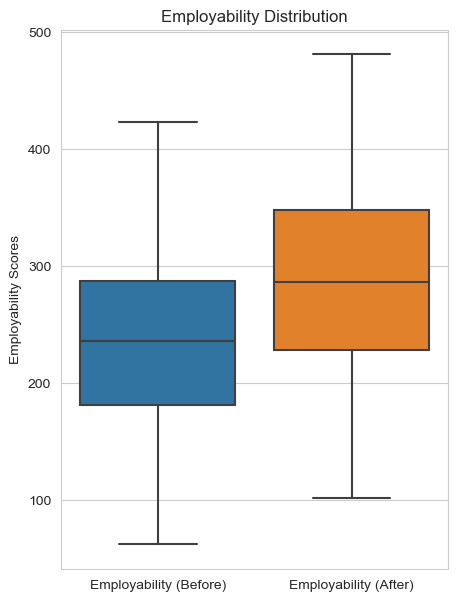

In [214]:
# plot distribution of Employability (Before) and Employability (After) using boxplot

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 7))
sns.boxplot(data=student_grades.loc[:, ["Employability (Before)", "Employability (After)"]])

plt.title("Employability Distribution")
ax.set_ylabel("Employability Scores")

plt.show()

#### On average, how much do the improvements in employability scores after the program vary from student to student?

In [215]:
print(rf"Mean of employability improvement: {np.mean(student_grades['Employability (After)'] - student_grades['Employability (Before)'])}" )
print(rf"Variance of employability improvement: {np.var(student_grades['Employability (After)'] - student_grades['Employability (Before)'], ddof=1)}" )
print(rf"Standard Deviation of employability improvement: {np.std(student_grades['Employability (After)'] - student_grades['Employability (Before)'], ddof=1)}" )

Mean of employability improvement: 49.44210526315789
Variance of employability improvement: 879.4194848824187
Standard Deviation of employability improvement: 29.655007753875545


#### What varies more for graduates - final grade averages or employability scores?

In [216]:
pd.DataFrame(
    columns=["MBA Grade", "Employability"],
    data=[
        [student_grades["MBA Grade"].mean(), student_grades["Employability (After)"].mean()],
        [np.std(student_grades["MBA Grade"], ddof=1), np.std(student_grades["Employability (After)"], ddof=1)],
        [np.var(student_grades["MBA Grade"], ddof=1), np.var(student_grades["Employability (After)"], ddof=1)],
        [np.std(student_grades["MBA Grade"], ddof=1)/student_grades["MBA Grade"].mean(), np.std(student_grades["Employability (After)"], ddof=1)/student_grades["Employability (After)"].mean()],
    ],
    index=["Mean", "Standard Deviation", "Variance", "Coefficient of Variation"]
)

,MBA Grade,Employability
Mean,80.169474,289.347368
Standard Deviation,6.170780,93.521049
Variance,38.078526,8746.186562
Coefficient of Variation,0.076972,0.323214


#### Calculate the variability of Undergrad Grades for Business and Non-Business students

In [217]:
iqr_bus = iqr(student_grades[student_grades["Undergrad Degree"] == "Business"].loc[:, "MBA Grade"])
iqr_nonbus = iqr(student_grades[student_grades["Undergrad Degree"] != "Business"].loc[:, "MBA Grade"])

In [218]:
pd.concat(
   [ pd.concat([student_grades[student_grades["Undergrad Degree"] == "Business"].loc[:, "MBA Grade"].describe().to_frame(name="Business Undergrad"), pd.DataFrame(student_grades[student_grades["Undergrad Degree"] != "Business"].loc[:, "MBA Grade"].describe().to_frame(name="Non-Business Undergrad"))], axis=1),
 pd.DataFrame(
    index=["IQR"],
    columns=["Business Undergrad", "Non-Business Undergrad"],
    data=[[iqr_bus, iqr_nonbus]]
)],
axis=0
)

,Business Undergrad,Non-Business Undergrad
count,36.000000,59.000000
mean,81.327778,79.462712
std,6.643433,5.808552
min,71.000000,62.600000
25%,76.825000,76.050000
50%,80.550000,80.000000
75%,87.250000,84.450000
max,96.100000,89.900000
IQR,10.425000,8.400000


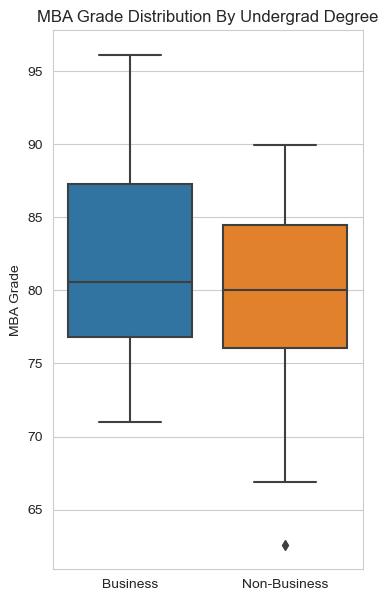

In [219]:
fig, ax = plt.subplots(figsize=(4, 7))
sns.boxplot(data=[student_grades[student_grades["Undergrad Degree"] == "Business"].loc[:, "MBA Grade"], student_grades[student_grades["Undergrad Degree"] != "Business"].loc[:, "MBA Grade"]], ax=ax)

plt.title("MBA Grade Distribution By Undergrad Degree")
ax.set_ylabel("MBA Grade")
ax.set_xticklabels(["Business", "Non-Business"])

plt.show()